# Demo

This is the demo to showcase some analysis process. For the analysis for each task, we have provided a corresponding class. 

In [1]:
# import analysis tools
from analysis import SUMStat, D2TStat, WMTStat

def truncate_print(l, n=10):
    """ Print the first n items of a list"""
    for i, x in enumerate(l):
        if i == n:
            print('...')
            break
        print(x)

## Summarization

For all summarization datasets, including **REALSumm**, **SummEval** and **Newsroom**, the analysis tools are the same.

In [2]:
summ_stat = SUMStat('SUM/REALSumm/final_p.pkl') # The path to the scored file, _p means we have prompted metrics

See what metrics are out there.<br>
Since there are a lot, including P, R, F variants for some metrics as well as prompted metrics, we only print a truncated version of metrics

In [3]:
print('[All metrics]')
truncate_print(summ_stat.metrics) # change to print if you want to see all metrics
print('[Automatic metrics]')
truncate_print(summ_stat.auto_metrics)
print('[Human metrics]')
truncate_print(summ_stat.human_metrics)

[All metrics]
litepyramid_recall
bert_score_p
bert_score_r
bert_score_f
mover_score
bart_score_src_hypo
bart_score_hypo_ref
bart_score_ref_hypo
bart_score_avg_f
bart_score_harm_f
...
[Automatic metrics]
bert_score_p
bert_score_r
bert_score_f
mover_score
bart_score_src_hypo
bart_score_hypo_ref
bart_score_ref_hypo
bart_score_avg_f
bart_score_harm_f
bart_score_cnn_src_hypo
...
[Human metrics]
litepyramid_recall


In [4]:
summ_stat.data[1].keys()#["sys_summs"].keys()

dict_keys(['src', 'ref_summ', 'sys_summs'])

In [5]:
summ_stat.data[1]["sys_summs"].keys()

dict_keys(['presumm_out_trans_abs.txt', 'two_stage_rl_out.txt', 'unilm_out_v2.txt', 't5_out_large.txt', 'presumm_out_ext_abs.txt', 'ptr_generator_out_pointer_gen_cov.txt', 'bart_out.txt', 'fast_abs_rl_out_rerank.txt', 't5_out_11B.txt', 'presumm_out_abs.txt', 'bottom_up_out.txt', 'unilm_out_v1.txt', 't5_out_base.txt', 'semsim_out.txt', 'neusumm_out.txt', 'pnbert_out_lstm_pn_rl.txt', 'refresh_out.txt', 'heter_graph_out.txt', 'pnbert_out_bert_tf_sl.txt', 'banditsumm_out.txt', 'pnbert_out_bert_lstm_pn_rl.txt', 'pnbert_out_bert_tf_pn.txt', 'matchsumm_out.txt', 'pnbert_out_bert_lstm_pn.txt'])

In [6]:
summ_stat.data[1]["sys_summs"]["bart_out.txt"]

{'sys_summ': 'The money was collected from students at the University of Surrey . Currency was submerged in agar - a substance that allows bacteria to grow quickly - and then monitored for three to four days . The students found thousands of bacteria colonies living on the sample of money . Most of the bacteria found on the coins studied was harmless . But MRSA and food poisoning bacteria have been found on money in previous studies . One ten pound note yielded Bacillus mycoides , which is common in soil , suggesting that someone was gardening before handling cash . The scientists found cases of staphylococcus aureus , which can cause boils and spots on the skin .',
 'scores': {'litepyramid_recall': 0.4545454545454545,
  'bert_score_p': tensor(0.2029),
  'bert_score_r': tensor(0.5115),
  'bert_score_f': tensor(0.3538),
  'mover_score': 0.2812629964850383,
  'bart_score_src_hypo': -0.9205112457275391,
  'bart_score_hypo_ref': -3.66383695602417,
  'bart_score_ref_hypo': -11.8475351333618

We can choose some metrics that we are interested in to conduct analysis.<br> 
For example, in **REALSumm**, we use recall-based metrics (e.g. bert_score_r, rouge1_r, bart_score_cnn_hypo_ref, ...)<br>
For others, we use F-based metrics (for metrics that only consider hypo and ref) and src->hypo (for generation based metrics like bart_score and prism)

In [7]:
valid_metrics = [
    'rouge1_r',
    'rouge2_r',
    'rougel_r',
    'bert_score_r',
    'mover_score',
    'prism_hypo_ref',
    'bart_score_cnn_hypo_ref'
]

# The first argument is the human metric considered.
# The second argument is a list of considered automatic metrics, can omit it if all automatic metrics are considered
summ_stat.evaluate_summary('litepyramid_recall', valid_metrics) 

Human metric: litepyramid_recall
metric                     spearman    kendalltau
-----------------------  ----------  ------------
rouge1_r                   0.497526      0.407974
rougel_r                   0.488254      0.402523
bart_score_cnn_hypo_ref    0.474608      0.374497
bert_score_r               0.440398      0.346489
rouge2_r                   0.4233        0.353119
prism_hypo_ref             0.411005      0.323994
mover_score                0.372353      0.290156


We can also see the performance of some prompt-based metrics.

In [8]:
valid_metrics = [
    'bart_score_cnn_hypo_ref_de_id est',
    'bart_score_cnn_hypo_ref_de_Videlicet',
    'bart_score_cnn_hypo_ref_de_To give an instance',
    'bart_score_cnn_hypo_ref_de_To give an example',
    'bart_score_cnn_hypo_ref_de_As an illustration'
]
summ_stat.evaluate_summary('litepyramid_recall', valid_metrics)

Human metric: litepyramid_recall
metric                                            spearman    kendalltau
----------------------------------------------  ----------  ------------
bart_score_cnn_hypo_ref_de_id est                 0.49539       0.392728
bart_score_cnn_hypo_ref_de_Videlicet              0.491011      0.388237
bart_score_cnn_hypo_ref_de_To give an instance    0.49081       0.387054
bart_score_cnn_hypo_ref_de_To give an example     0.489033      0.38625
bart_score_cnn_hypo_ref_de_As an illustration     0.488977      0.385511


To combine prompt-based metrics, run the following

In [9]:
summ_stat.combine_prompt()
summ_stat.evaluate_summary('litepyramid_recall', ['bart_score_cnn_hypo_ref_en', 'bart_score_cnn_hypo_ref_de'])

Human metric: litepyramid_recall
metric                        spearman    kendalltau
--------------------------  ----------  ------------
bart_score_cnn_hypo_ref_de    0.48784       0.386398
bart_score_cnn_hypo_ref_en    0.473965      0.373516


To conduct bootstrapping significant test, we provide the *sig_test_two ( )* and *sig_test ( )* method.

In [ ]:
# The first two arguments are metrics that should be compared, the third argument is the human metric.
m1 = 'bart_score_cnn_hypo_ref'
m2 = 'bert_score_r'
result = summ_stat.sig_test_two(m1, m2, 'litepyramid_recall')
if result == 1:
    print(f'{m1} is significantly better than {m2}')
elif result == -1:
    print(f'{m2} is significantly better than {m1}')
else:
    print('cannot decide')

In [ ]:
# The first arguments are a list of metrics considered
# The second argument is the human metric
summ_stat.sig_test(['rouge1_r', 'bart_score_cnn_hypo_ref', 'bert_score_r'], 'litepyramid_recall')

### Analysis

Play around w/ BARTScore scores in different datasets.
- [ ] break down Kendall Tau results and examine its discrepancies w/ human judgements
- [ ] are there task-specific errors

In the case of RealSumm the metrics of interest are: 
- __human metrics__: `litepyramid_recall`
- __learned metric__: `bart_score_cnn_hypo_ref`

In [10]:
def get_dataframe(data, human_metric):

    print("Evaluation dataset:", len(data), "examples")
    print("Comparing metrics", human_metric)

    from collections import defaultdict
    model_data = defaultdict(list)

    for doc_id, doc_metadata in data.items():
        doc_models_metadata = doc_metadata["sys_summs"]

        for model_name, model_metadata in doc_models_metadata.items():
            model_data["id"].append(doc_id)
            model_data["summary"].append(doc_metadata["src"])
            model_data["reference"].append(doc_metadata["ref_summ"])
            model_data["model"].append(model_name)
            
            model_data["candidate"].append(model_metadata["sys_summ"])
            model_data["human_score"].append(model_metadata["scores"][human_metric])
            
            for metric, score in model_metadata["scores"].items():
                if metric != human_metric:
                    model_data[metric].append(float(score))


    import pandas as pd
    return pd.DataFrame(model_data).sort_values(by="id")


model_data = get_dataframe(summ_stat.data, "litepyramid_recall")
model_data.head()

Evaluation dataset: 100 examples
Comparing metrics litepyramid_recall


,id,summary,reference,model,candidate,human_score,bert_score_p,bert_score_r,bert_score_f,mover_score,...,bart_score_cnn_avg_f_de_To be specific,bart_score_cnn_harm_f_de_To be specific,bart_score_cnn_ref_hypo_en,bart_score_cnn_ref_hypo_de,bart_score_cnn_hypo_ref_en,bart_score_cnn_hypo_ref_de,bart_score_cnn_avg_f_en,bart_score_cnn_avg_f_de,bart_score_cnn_harm_f_en,bart_score_cnn_harm_f_de
1809,0,( cnn ) two cnn heroes are among the earthquak...,Anuradha Koirala and 425 young women and girls...,presumm_out_abs.txt,Anuradha koirala has a rehab center in kathman...,0.0,0.278758,0.247021,0.264038,0.101913,...,-3.281988,-1.584504,-2.483502,-2.761642,-3.703487,-3.885131,-3.093494,-3.323387,-1.486583,-1.614040
1801,0,( cnn ) two cnn heroes are among the earthquak...,Anuradha Koirala and 425 young women and girls...,two_stage_rl_out.txt,Anuradha koirala is the founder of maiti nepal...,0.1,0.210054,0.178377,0.195475,0.016639,...,-3.770746,-1.874277,-3.324501,-3.562252,-3.918261,-4.080406,-3.621381,-3.821329,-1.798506,-1.901817
1802,0,( cnn ) two cnn heroes are among the earthquak...,Anuradha Koirala and 425 young women and girls...,unilm_out_v2.txt,Two cnn heroes are among the earthquake surviv...,0.5,0.257093,0.359413,0.308881,0.290888,...,-2.763418,-1.378526,-2.632117,-2.930829,-2.408297,-2.696626,-2.520207,-2.813727,-1.257599,-1.404299
1803,0,( cnn ) two cnn heroes are among the earthquak...,Anuradha Koirala and 425 young women and girls...,t5_out_large.txt,Cnn heroes anuradha koirala and pushpa basu ar...,0.2,0.166144,0.112345,0.140499,0.022013,...,-3.909444,-1.951297,-3.854784,-4.154273,-3.552139,-3.812238,-3.703462,-3.983256,-1.848614,-1.987822
1804,0,( cnn ) two cnn heroes are among the earthquak...,Anuradha Koirala and 425 young women and girls...,presumm_out_ext_abs.txt,Anuradha koirala rescues victims of sex traffi...,0.1,0.237865,0.223772,0.232058,0.099405,...,-3.450529,-1.673068,-2.732934,-2.897373,-3.889542,-4.060446,-3.311238,-3.478910,-1.605094,-1.690687


In [11]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Math processing
import numpy as np

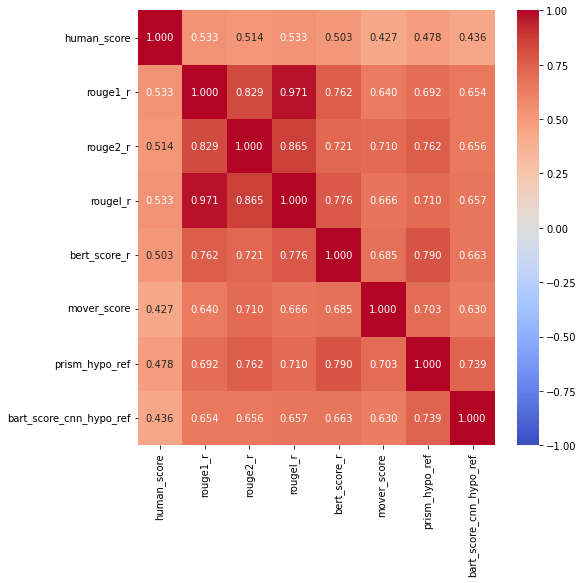

In [12]:
def heatmap(data, method="spearman", title="", figsize=(20, 15)):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.heatmap(data.corr(method=method), vmin=-1, vmax=1, cmap="coolwarm", annot=True, fmt=".3f")
    plt.show()

# Remove prompt templates and "id" column
cols = [c for c in model_data.columns if ("_de" not in c) and ("_en" not in c)][1:]

# Paper metrics (table 4)
summ_metrics = [
    'human_score', 
    'rouge1_r',
    'rouge2_r',
    'rougel_r',
    'bert_score_r',
    'mover_score',
    'prism_hypo_ref',
    'bart_score_cnn_hypo_ref',
]
heatmap(model_data[summ_metrics], figsize=(8, 8))

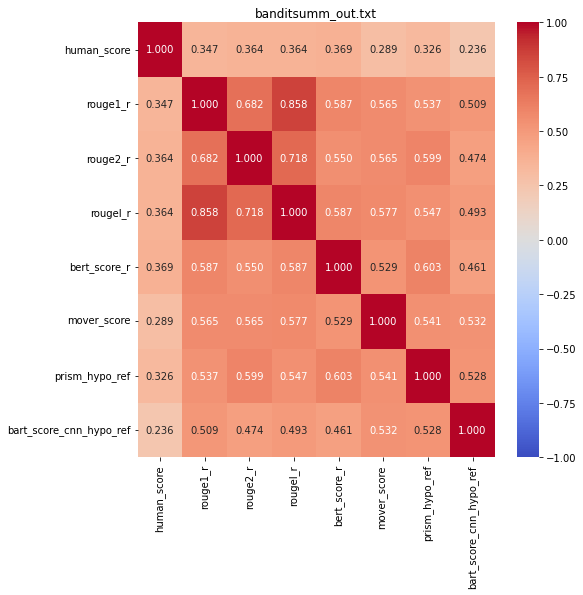

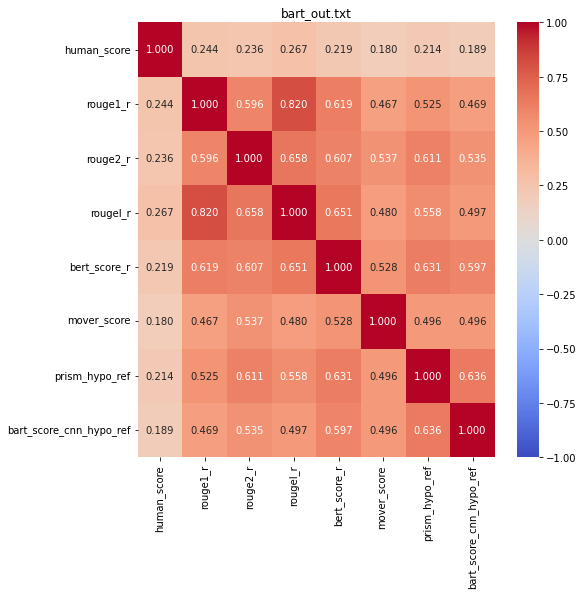

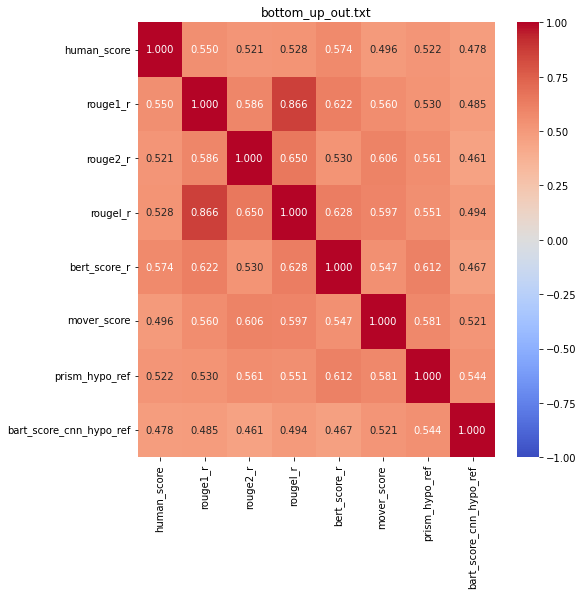

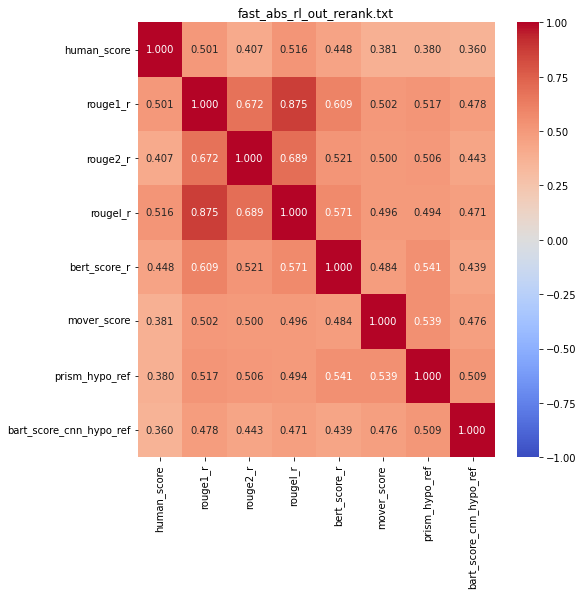

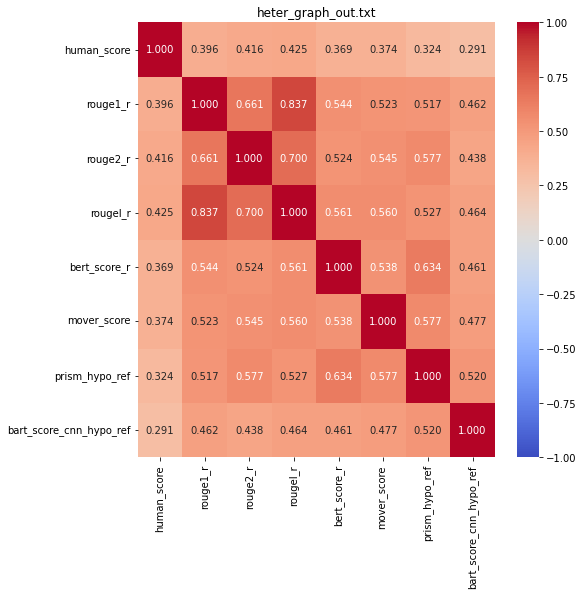

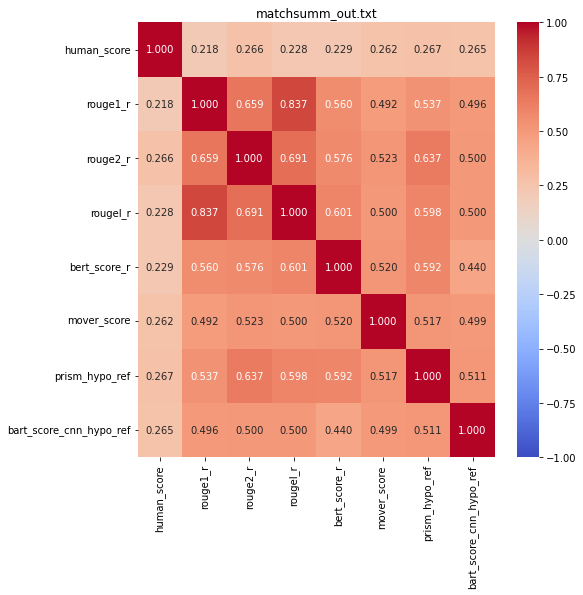

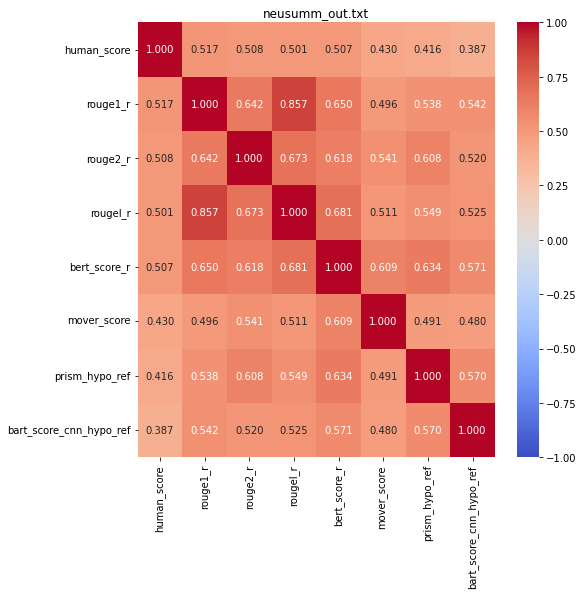

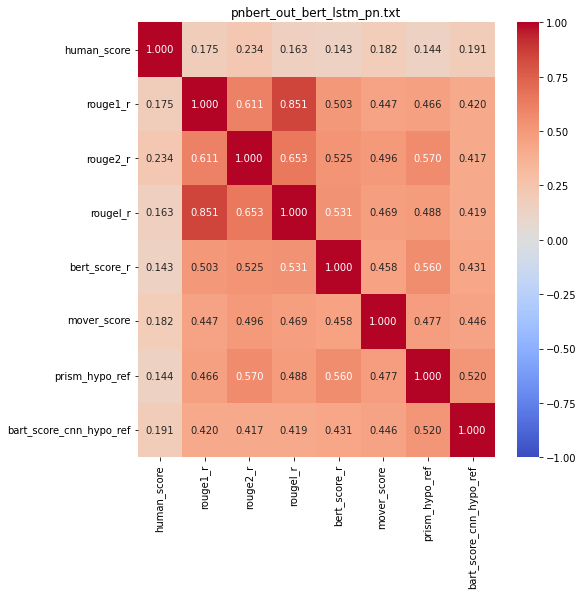

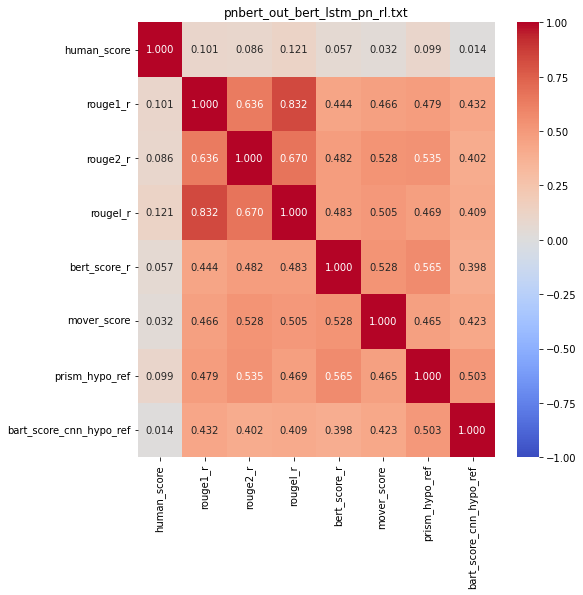

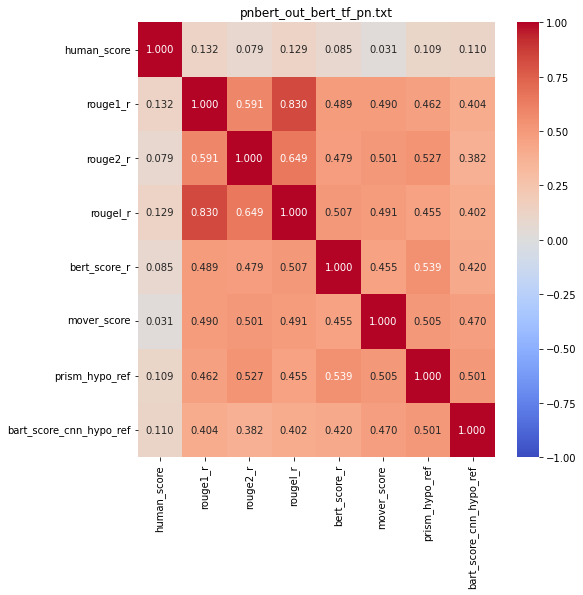

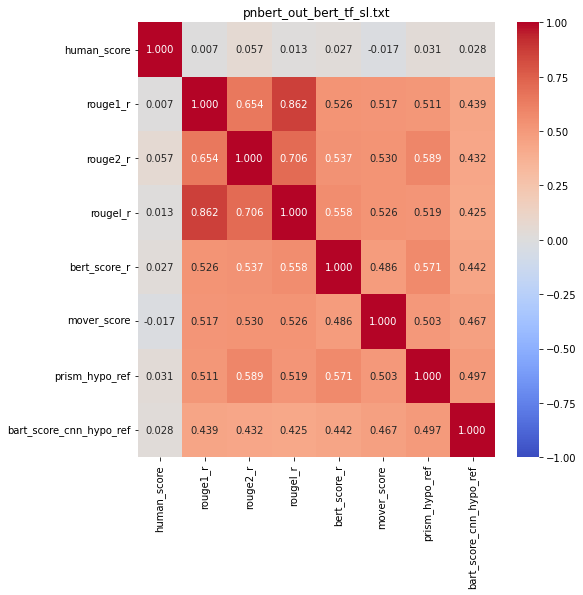

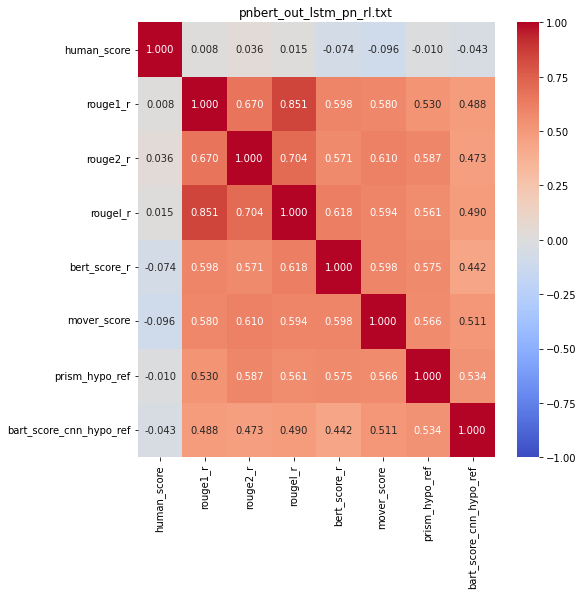

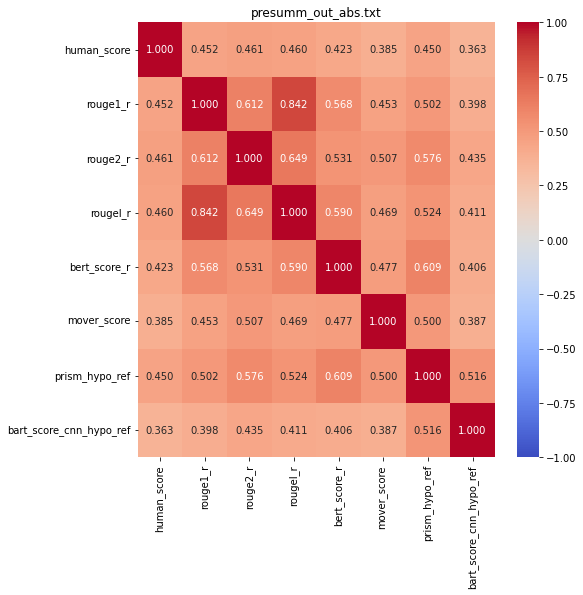

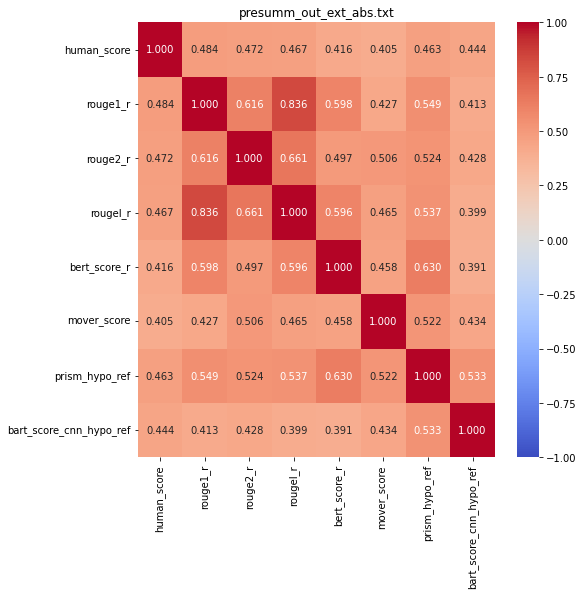

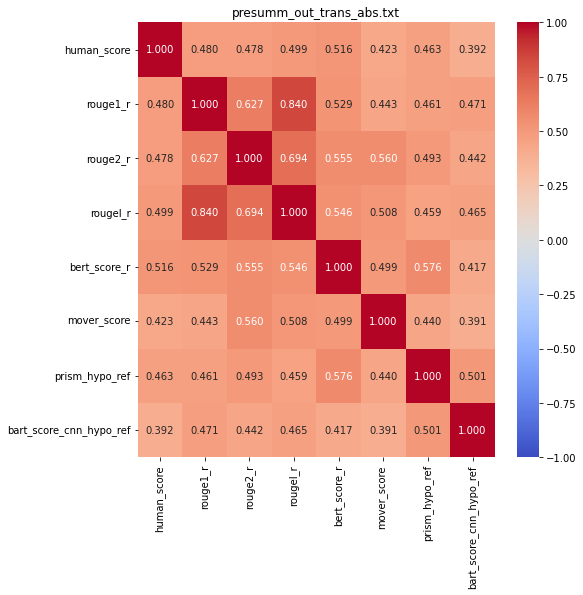

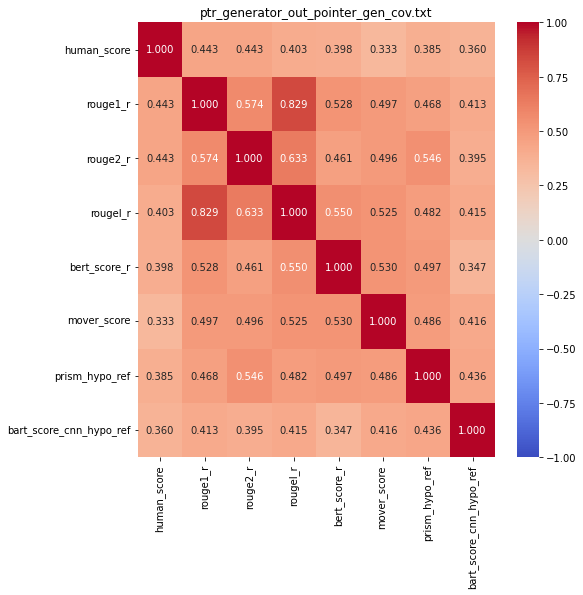

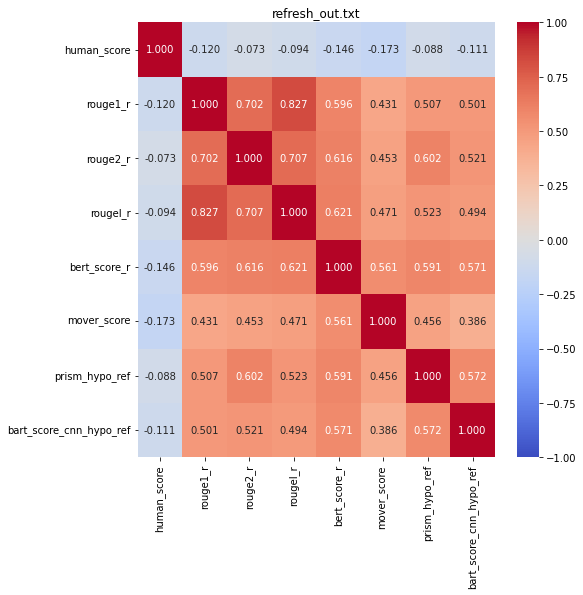

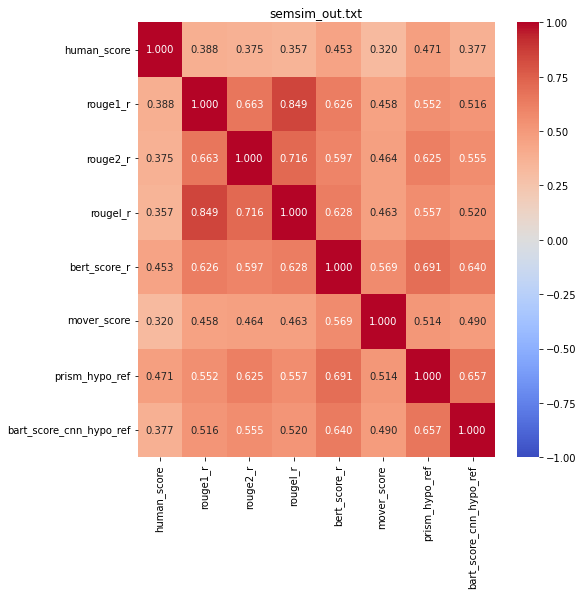

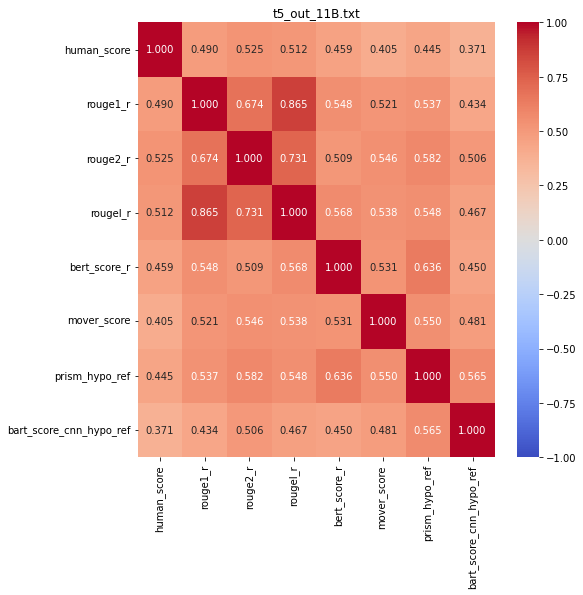

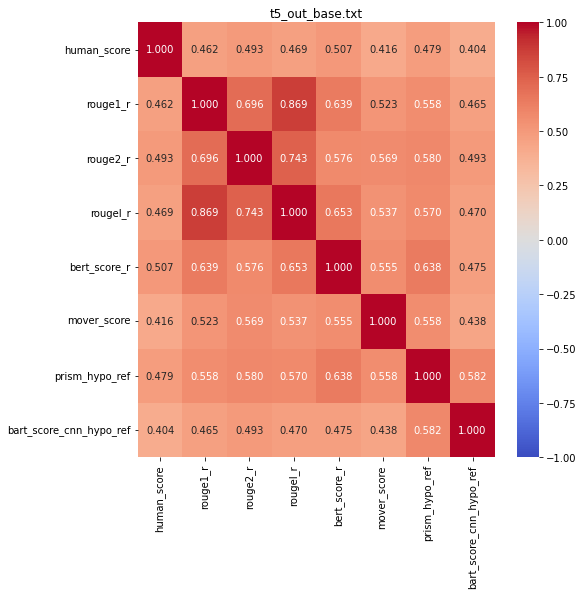

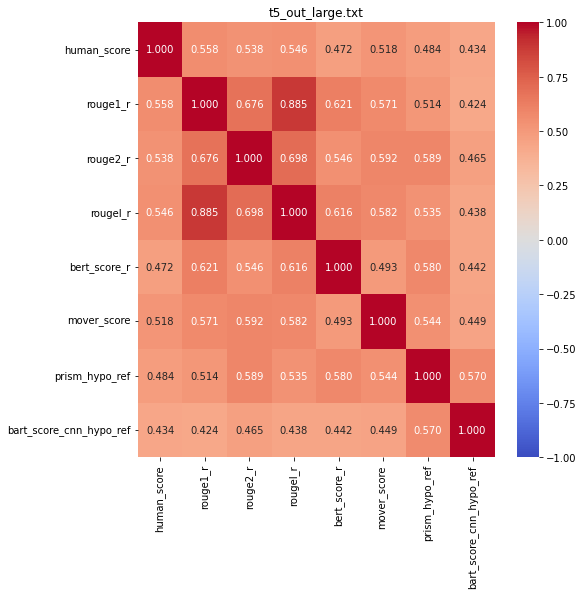

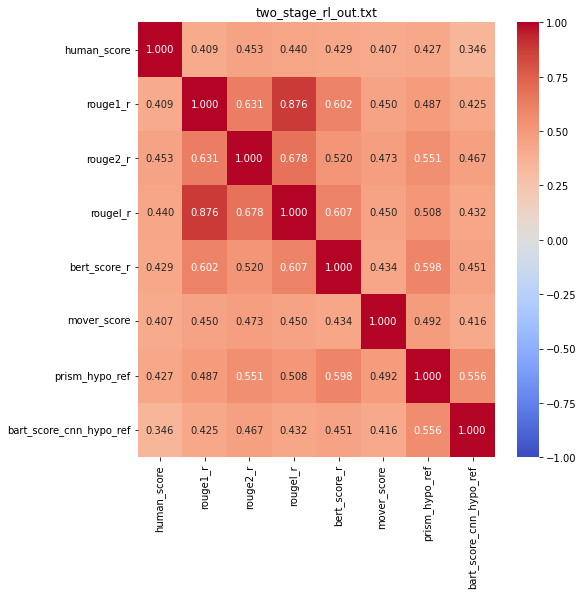

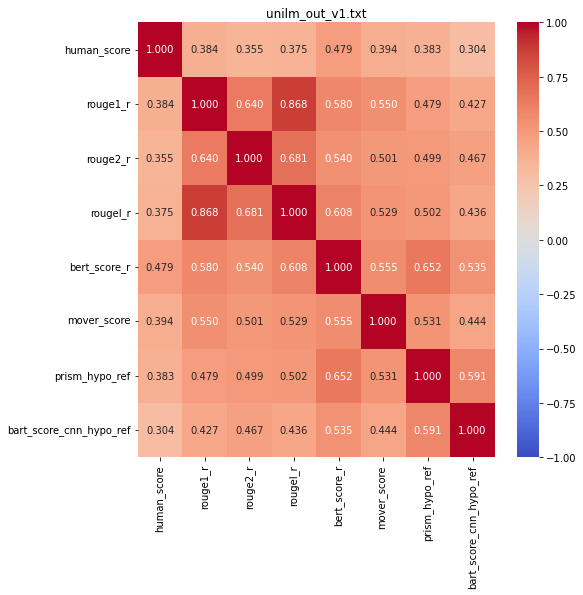

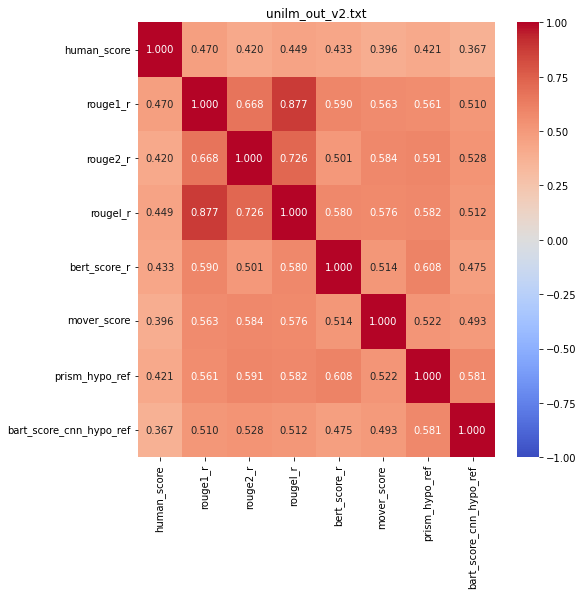

In [13]:
# Correlation by model
for model in sorted(model_data.model.unique()):
    data = model_data[model_data.model == model][summ_metrics].copy()
    heatmap(data, method="kendall", title=model, figsize=(8, 8))

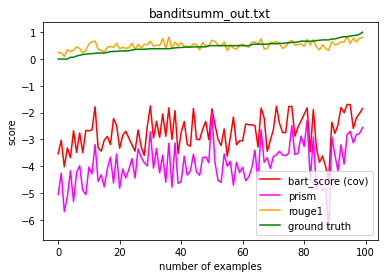

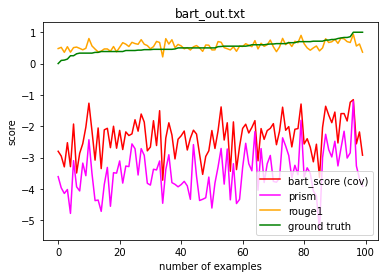

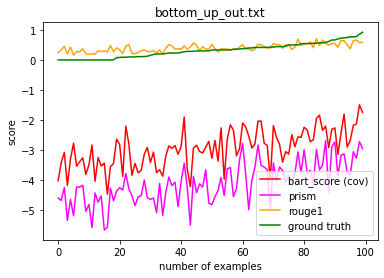

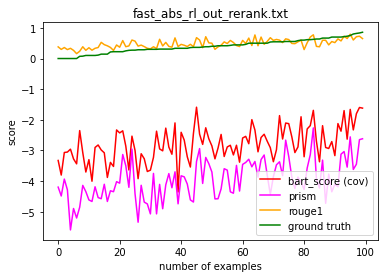

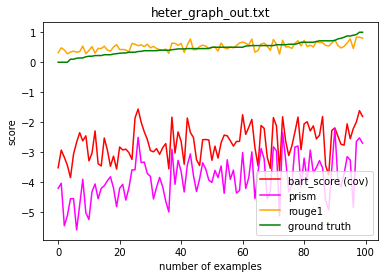

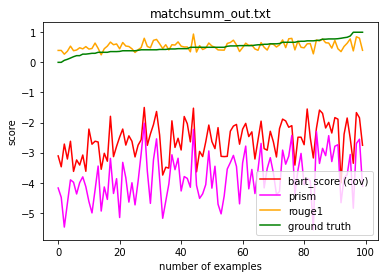

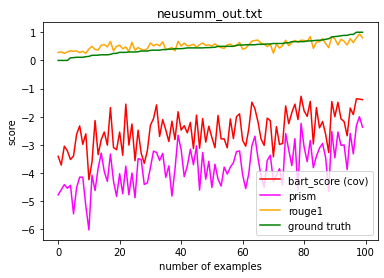

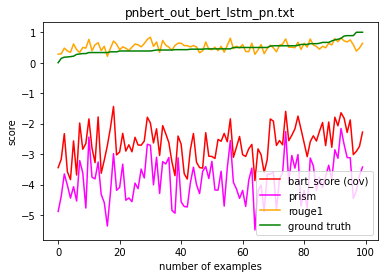

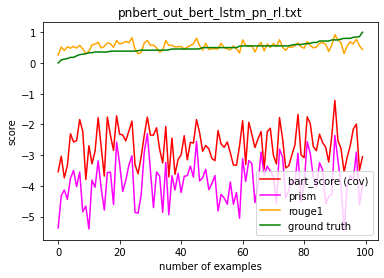

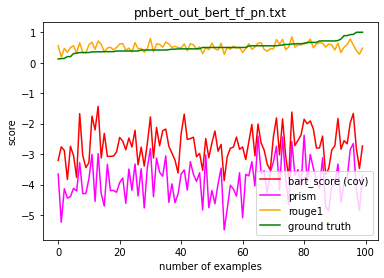

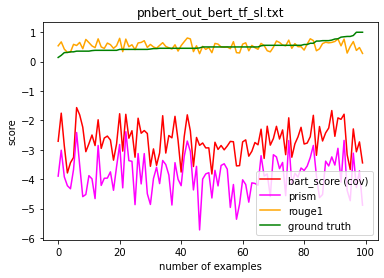

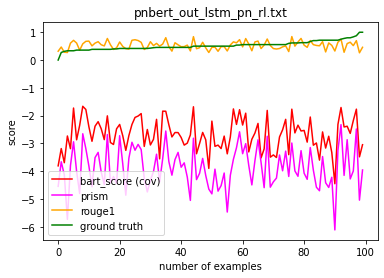

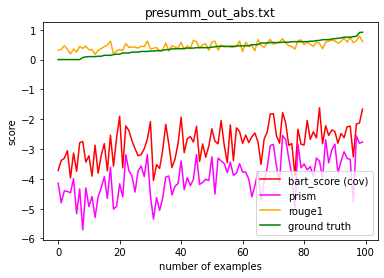

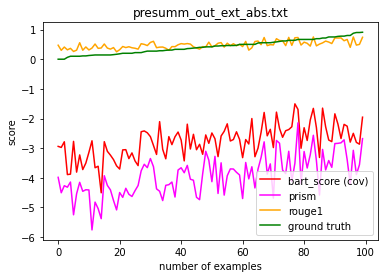

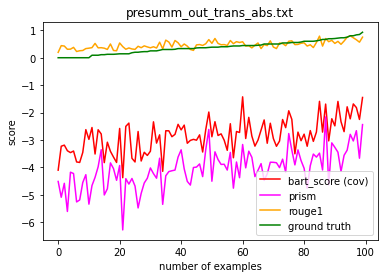

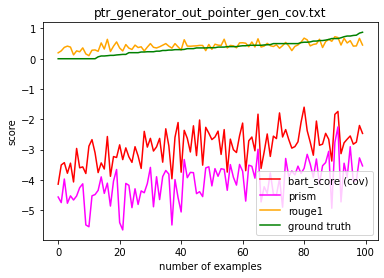

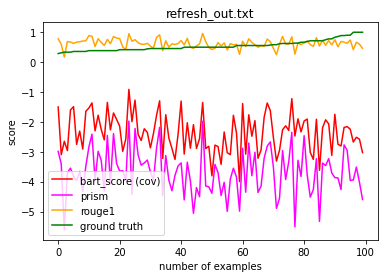

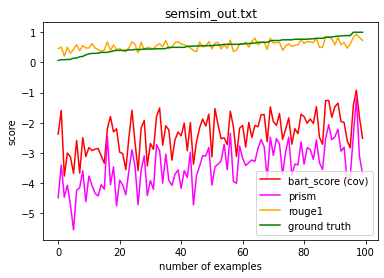

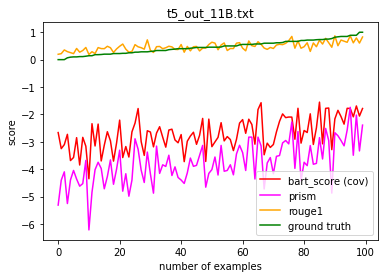

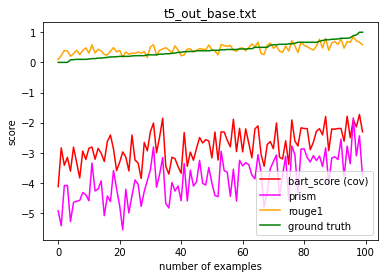

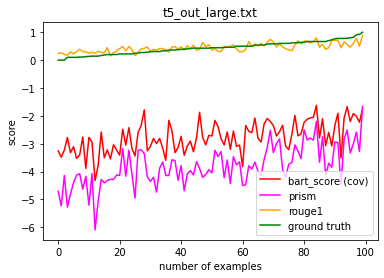

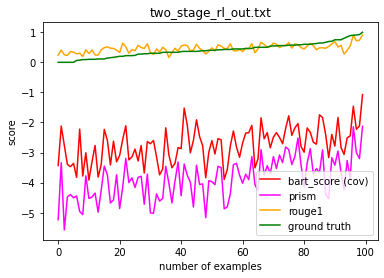

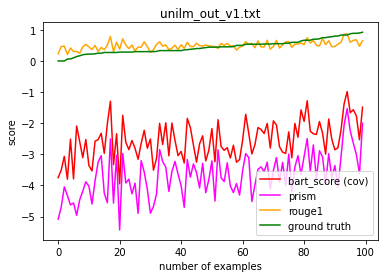

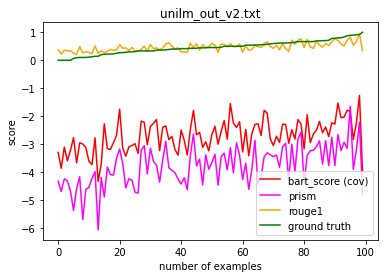

In [14]:
# Correlation by model
for model in sorted(model_data.model.unique()):
    data = model_data[model_data.model == model][summ_metrics].copy()
    data = data.sort_values(by="human_score")
    
    sns.lineplot(data=data, x=np.arange(len(data)), y="bart_score_cnn_hypo_ref", color="red", label="bart_score (cov)")
    sns.lineplot(data=data, x=np.arange(len(data)), y="prism_hypo_ref", color="magenta", label="prism")
    sns.lineplot(data=data, x=np.arange(len(data)), y="rouge1_r", color="orange", label="rouge1")
    sns.lineplot(data=data, x=np.arange(len(data)), y="human_score", color="green", label="ground truth")

    plt.ylabel("score")
    plt.xlabel("number of examples")
    plt.title(model)
    plt.show()

In [ ]:
# Correlation by model
for model in sorted(model_data.model.unique()):
    data = model_data[model_data.model == model][summ_metrics].copy()
    data = data.sort_values(by="human_score")
    
    sns.scatterplot(x=data["human_score"], y=data["bart_score_cnn_hypo_ref"])
    plt.title(model)
    plt.show()

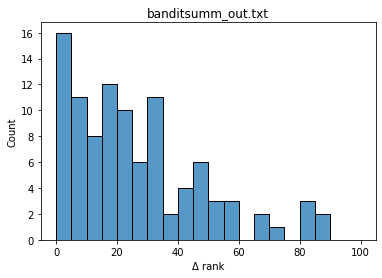

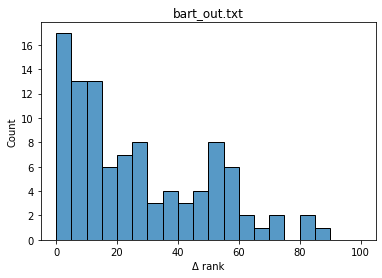

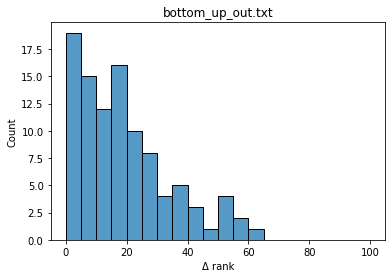

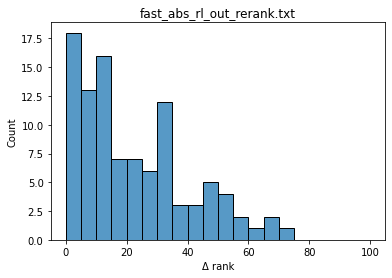

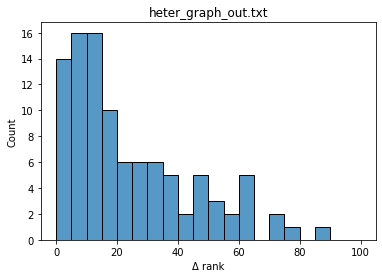

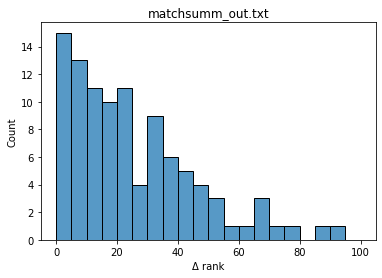

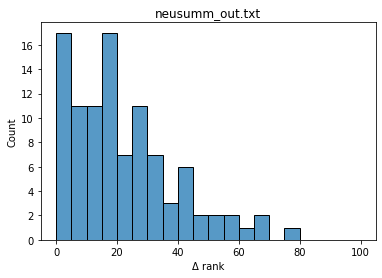

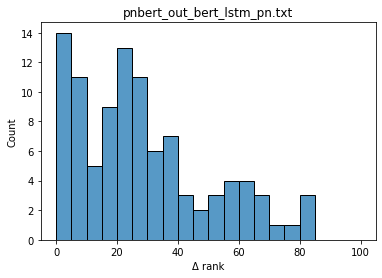

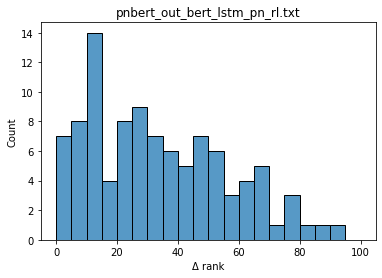

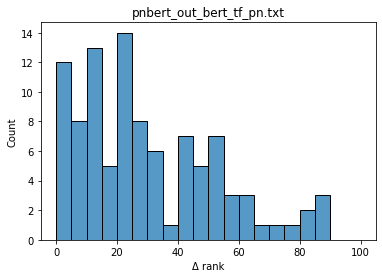

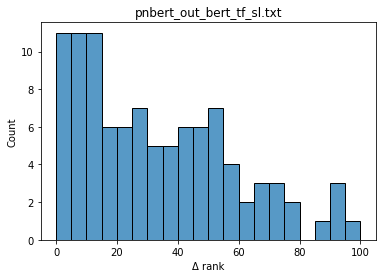

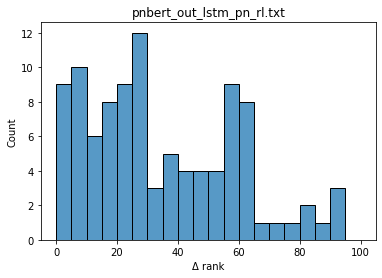

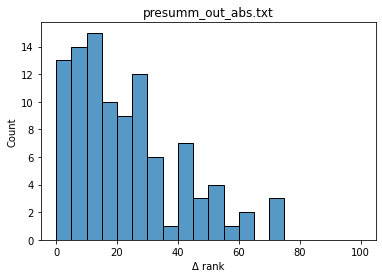

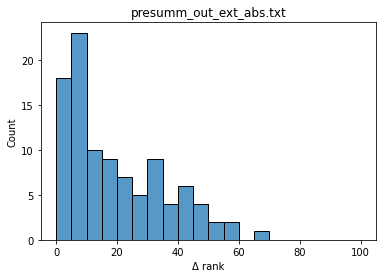

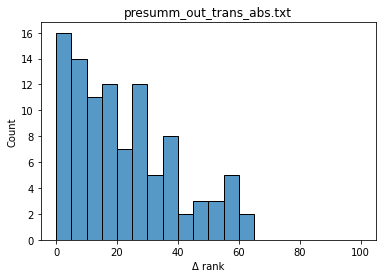

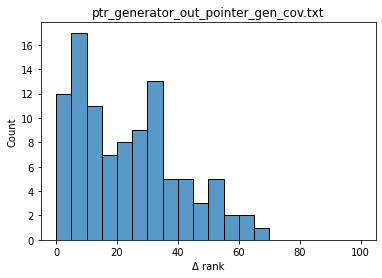

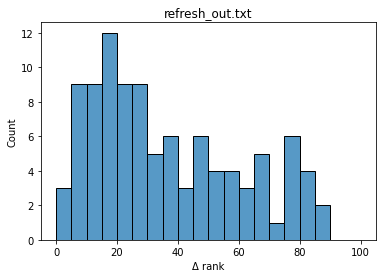

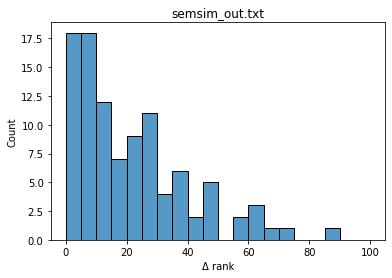

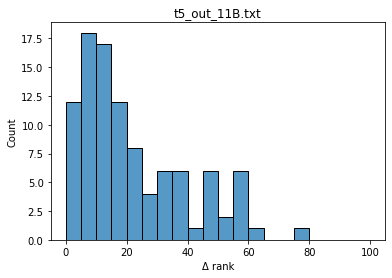

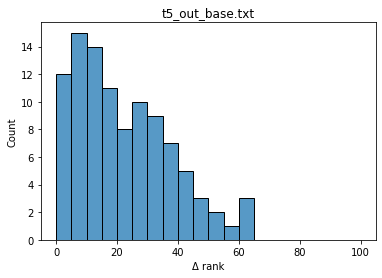

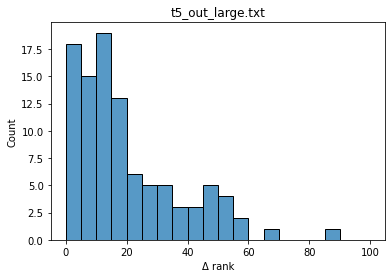

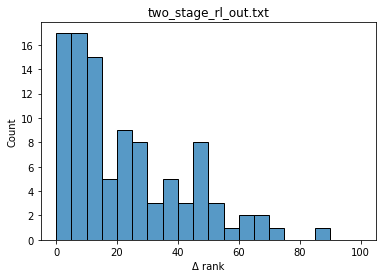

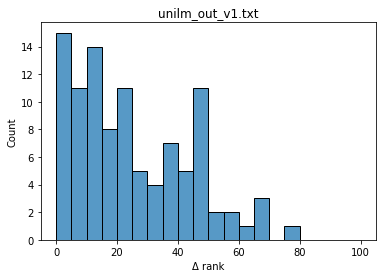

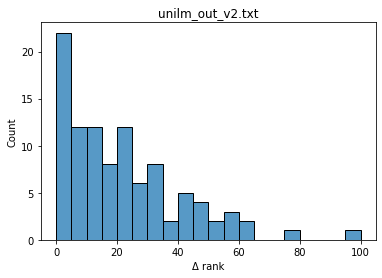

In [19]:
# Correlation by model
for model in sorted(model_data.model.unique()):
    data = model_data[model_data.model == model].copy()
    data = data.sort_values(by="human_score")
    
    human_scores_ranks = np.argsort(-1 * data["human_score"])
    model_scores_ranks = np.argsort(-1 * data["bart_score_cnn_hypo_ref"])
    
    data["Δ rank"] = np.abs(human_scores_ranks - model_scores_ranks)
   
    sns.histplot(data["Δ rank"], bins=20, binrange=(0, 100))
    plt.title(model)
    plt.show()

In [ ]:
def show_examples(data, value: int, comparison: str="=="):
    assert comparison in ("==", ">", "<")
    
    if comparison == "==":
        examples = data[data["rank"] == value]
    elif comparison == ">":
        examples = data[data["rank"] > value]
    elif comparison == "<":
        examples = data[data["rank"] < value]
    else:
        raise NotImplemented
        
    for i, example in examples.iterrows():
        print("=" * 40, "Example id", i, "=" * 40)
        print("[Ranks]  Human:", round(example["human_rank"], 2), 
              "| BartScore:", round(example["bartscore_rank"], 2), 
              "| PRISM:", round(example["prism_rank"], 2),
        )
        print("[Scores] Human:", round(example["human_score"], 2), 
              "| BartScore:", round(example["bart_score_cnn_hypo_ref"], 2), 
              "| PRISM:", round(example["prism_hypo_ref"], 2)
        )
        print("[Length] Reference:", len(example["reference"]), "|  Candidate:", len(example["candidate"]),
              "\n")

        print("Reference Summary:\n -->", example["reference"])
        print()
        print("Candidate Summary:\n -->", example["candidate"])
        print()
        
        
        
model = "bart_out.txt"
data = model_data[model_data.model == model].copy()
data = data.sort_values(by="human_score")

human_scores_ranks = np.argsort(-1 * data["human_score"])
model_scores_ranks = np.argsort(-1 * data["bart_score_cnn_hypo_ref"])

data["rank"] = np.abs(human_scores_ranks - model_scores_ranks)

data["human_rank"] = human_scores_ranks
data["bartscore_rank"] = model_scores_ranks
data["prism_rank"] = np.argsort(-1 * data["prism_hypo_ref"])
show_examples(data, value=80, comparison=">")

In [ ]:
data.bart_score_cnn_hypo_ref.sort_values(ascending=False).tail(15)

In [ ]:
data["candidate_len"] = data["candidate"].apply(len)
data["reference_len"] = data["reference"].apply(len)

sns.regplot(data=data, y="candidate_len", x="bart_score_cnn_hypo_ref")

## Factuality

We use **Rank19** dataset and **QAGS_CNN** dataset to showcase some basic usages. The former uses accuracy as its evaluation metric while the latter uses pearson correlation.

### Rank19

We first print out the factuality accuracy obtained using different metrics for the **Rank19** dataset.

In [ ]:
fact_stat = SUMStat('SUM/Rank19/final_p.pkl')
fact_stat.combine_prompt()

# Set valid metrics
valid_metrics = [
    'rouge1_f',
    'rouge2_f',
    'rougel_f',
    'bert_score_f',
    'mover_score',
    'prism_src_hypo',
    'bart_score_cnn_src_hypo',
    'bart_score_cnn_src_hypo_de'
]

# Print accuracy, take a list of metrics
fact_stat.get_fact_acc(valid_metrics)

Below are some methods that help to facilitate the siginificant test.

In [ ]:
m1 = 'bart_score_cnn_src_hypo'
m2 = 'bert_score_f'
result = fact_stat.fact_acc_sig_test_two(m1, m2)
if result == 1:
    print(f'{m1} is significantly better than {m2}')
elif result == -1:
    print(f'{m2} is significantly better than {m1}')
else:
    print('cannot decide')

In [ ]:
# Take a list of metrics, print the best metrics
fact_stat.fact_acc_sig_test(['bart_score_cnn_src_hypo', 'prism_src_hypo', 'bert_score_f'])

### QAGS_CNN

In [ ]:
fact_stat = SUMStat('SUM/QAGS_CNN/final_p.pkl')
fact_stat.combine_prompt()

# Set valid metrics
valid_metrics = [
    'rouge1_f',
    'rouge2_f',
    'rougel_f',
    'bert_score_f',
    'mover_score',
    'prism_src_hypo',
    'bart_score_cnn_src_hypo',
    'bart_score_cnn_src_hypo_de'
]

# Print accuracy, take a list of metrics
fact_stat.get_fact_pearson(valid_metrics)

In [ ]:
m1 = 'bart_score_cnn_src_hypo'
m2 = 'bert_score_f'
result = fact_stat.fact_pearson_sig_test_two(m1, m2)
if result == 1:
    print(f'{m1} is significantly better than {m2}')
elif result == -1:
    print(f'{m2} is significantly better than {m1}')
else:
    print('cannot decide')

In [ ]:
# Take a list of metrics, print the best metrics
fact_stat.fact_pearson_sig_test(['bart_score_cnn_src_hypo', 'prism_src_hypo', 'bert_score_f'])

## Summarization Analysis

In [ ]:
data = re

## Data-to-Text

For all data-to-text datasets, including **BAGEL**, **SFHOT** and **SFRES**, the analysis tools are the same.

In [ ]:
d2t_stat = D2TStat('D2T/BAGEL/final_p.pkl')
d2t_stat.combine_prompt() # combine the prompt-based resutls

See what metrics are out there. For data-to-text datasets, the human metrics are *informativeness*, *naturalness* and *quality*.

In [ ]:
print('[All metrics]')
truncate_print(d2t_stat.metrics) # change to print if you want to see all metrics
print('[Automatic metrics]')
truncate_print(d2t_stat.auto_metrics)
print('[Human metrics]')
truncate_print(d2t_stat.human_metrics)

We can print out the correlation w.r.t. human judgement as below.

In [ ]:
# Set valid metrics
valid_metrics = [
    'rouge1_f',
    'rouge2_f',
    'rougel_f',
    'bert_score_f',
    'mover_score',
    'prism_avg',
    'bart_score_para_avg_f',
    'bart_score_para_avg_f_de'
]

# The first argument is human metric while the latter is a list of metrics considered.
d2t_stat.evaluate_text('informativeness', valid_metrics)

To perform significant test, use *sig_test_two ( )* method

In [ ]:
m1 = 'bart_score_para_avg_f'
m2 = 'prism_avg'

# The first two arguments are metrics that should be compared, the third argument is the human metric.
result = d2t_stat.sig_test_two(m1, m2, 'informativeness')

if result == 1:
    print(f'{m1} is significantly better than {m2}')
elif result == -1:
    print(f'{m2} is significantly better than {m1}')
else:
    print('cannot decide')

## Machine Translation

For all language pairs, the analysis tools are the same. We begin by looking at reference length statistics.

In [ ]:
wmt_stat = WMTStat('WMT/kk-en/final_p.pkl')
wmt_stat.print_ref_len()

Next, we print out k-tau for all automatic metrics.

In [ ]:
print('All metrics')
print(wmt_stat.metrics) # Print out all metrics
print('\n')
print('All k-tau')
wmt_stat.print_ktau()
print('\n')
print('k-tau for some metrics')
wmt_stat.print_ktau(['prism', 'bart_score_para'])

To print out the k-tau over certain reference length, run the following.

In [ ]:
print('All k-tau')
wmt_stat.print_len_ktau(15, 25)
print('\n')
print('k-tau for some metrics')
wmt_stat.print_len_ktau(15, 25, ['prism', 'bart_score_para'])

To perform significant test, use *sig_test_two ()*

In [ ]:
m1 = 'bart_score_para'
m2 = 'bleurt'

# The first two arguments are metrics that should be compared, the third argument is the human metric.
result = wmt_stat.sig_test_two(m1, m2)

if result == 1:
    print(f'{m1} is significantly better than {m2}')
elif result == -1:
    print(f'{m2} is significantly better than {m1}')
else:
    print('cannot decide')